In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib widget

def extract_from_txt(file_path, labels, delimiter='\n'):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data_dict = {label: [] for label in labels}
    last_delimiter_index = 0
    messages = []
    for i in range(len(lines)):
        if(lines[i].startswith(delimiter)):
            messages.append(lines[last_delimiter_index:i])
            last_delimiter_index = i
    for message in messages:
        message_dict = {label: [] for label in labels}
        for label in labels:
            for line in message:
                    if(line.startswith(label)):
                        message_dict[label].append(float(line.split(':')[1]))
        full = True
        for key in message_dict:
            if(len(message_dict[key]) == 0):
                full=False
                break
        if(full):
            for label in labels:
                data_dict[label].append(message_dict[label][0])

    # for series in data_dict:
    #     print(series, len(data_dict[series]))

    df_raw = pd.DataFrame(data_dict)
    return df_raw

def remove_even_lines(input_file_path, output_file_path):
    with open(input_file_path, 'r') as file:
        lines = file.readlines()
    
    with open(output_file_path, 'w') as file:
        for i, line in enumerate(lines):
            if i % 2 == 0:
                file.write(line)

In [22]:
df_log1 = extract_from_txt(
    "./2024-07-27_22-50-50_encoder_mapping_7_27.txt", 
    [
        't',
        'pA',
        'pB',
        'mA',
        'mB',
        'eA', 
        'eB', 
        'I'
    ],
    '#'
)

df_log1['pA'] = -df_log1['pA']
df_log1['pB'] = -df_log1['pB']
df_log1['mA'] = -df_log1['mA']
df_log1['mB'] = -df_log1['mB']


# fig, axs = plt.subplots(3,1, figsize=(10,8), sharex=True)
# axs[0].plot(df_log1['t'], df_log1['pA'], label='Power A')
# axs[0].plot(df_log1['t'], df_log1['pB'], label='Power B')
# axs[1].plot(df_log1['t'], df_log1['mA'], label='Motor pos A')
# axs[1].plot(df_log1['t'], df_log1['mB'], label='Motor pos B')
# axs[1].set_ylim(-2e6, 2e6)
# axs[2].plot(df_log1['t'], df_log1['eA'], label='Encoder pos A')
# axs[2].plot(df_log1['t'], df_log1['eB'], label='Encoder pos B')
# for ax in axs:
#     ax.legend()

df_log2 = extract_from_txt(
    "./2024-07-27_22-53-11_encoder_mapping_7_27.txt", 
    [
        't',
        'pA',
        'pB',
        'mA',
        'mB',
        'eA', 
        'eB', 
        'I'
    ],
    '#'
)

df_log2['pA'] = -df_log2['pA']
df_log2['pB'] = -df_log2['pB']
df_log2['mA'] = -df_log2['mA']
df_log2['mB'] = -df_log2['mB']


# fig, axs = plt.subplots(3,1, figsize=(10,8), sharex=True)
# axs[0].plot(df_log2['t'], df_log2['pA'], label='Power A')
# axs[0].plot(df_log2['t'], df_log2['pB'], label='Power B')
# axs[1].plot(df_log2['t'], df_log2['mA'], label='Motor pos A')
# axs[1].plot(df_log2['t'], df_log2['mB'], label='Motor pos B')
# axs[1].set_ylim(-2e6, 2e6)
# axs[2].plot(df_log2['t'], df_log2['eA'], label='Encoder pos A')
# axs[2].plot(df_log2['t'], df_log2['eB'], label='Encoder pos B')
# for ax in axs:
#     ax.legend()


Text(0.5, 1.0, 'Scatter plot of Encoder pos B vs Motor pos B')

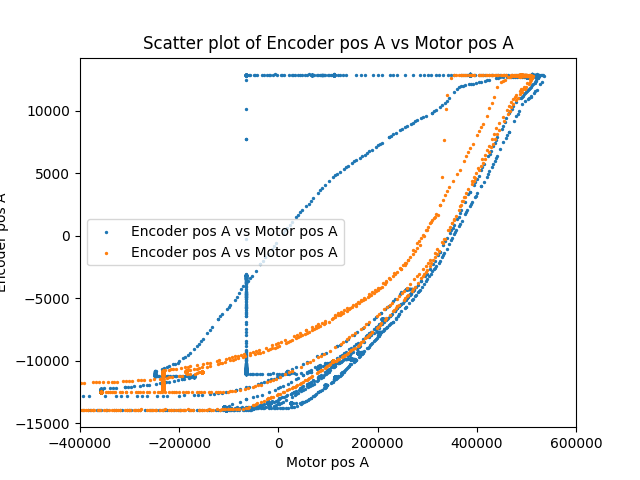

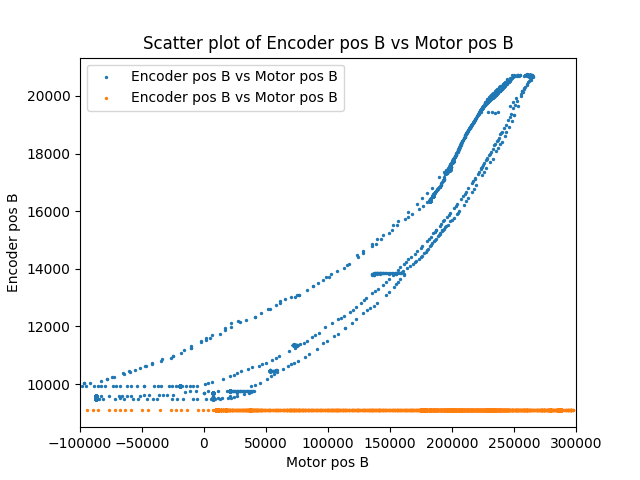

In [28]:
plt.figure()
plt.scatter(df_log1['mA'], df_log1['eA'], s=2, label='Encoder pos A vs Motor pos A')
plt.scatter(df_log2['mA'], df_log2['eA'], s=2, label='Encoder pos A vs Motor pos A')
plt.xlim(-4e5, 6e5)
plt.xlabel('Motor pos A')
plt.ylabel('Encoder pos A')
plt.legend()
plt.title('Scatter plot of Encoder pos A vs Motor pos A')

plt.figure()
plt.scatter(df_log1['mB'], df_log1['eB'], s=2, label='Encoder pos B vs Motor pos B')
plt.scatter(df_log2['mB'], df_log2['eB'], s=2, label='Encoder pos B vs Motor pos B')
plt.xlim(-1e5, 3e5)
plt.xlabel('Motor pos B')
plt.ylabel('Encoder pos B')
plt.legend()
plt.title('Scatter plot of Encoder pos B vs Motor pos B')